In [6]:
house <- read.csv('house_rental.csv.txt')

In [7]:
fit <- lm(Price ~ Sqft + Floor + TotalFloor  + Bedroom + Living.Room + Bathroom, data=house)

In [8]:
summary(fit)


Call:
lm(formula = Price ~ Sqft + Floor + TotalFloor + Bedroom + Living.Room + 
    Bathroom, data = house)

Residuals:
   Min     1Q Median     3Q    Max 
-71429 -11314  -2075   8480 104063 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2669.268   3665.690   0.728    0.467    
Sqft           37.884      1.615  23.456  < 2e-16 ***
Floor        1025.887    241.543   4.247 2.49e-05 ***
TotalFloor    135.451    197.033   0.687    0.492    
Bedroom     -1775.956   1079.401  -1.645    0.100    
Living.Room -3368.837   2078.469  -1.621    0.106    
Bathroom     2777.701   1835.922   1.513    0.131    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19560 on 638 degrees of freedom
Multiple R-squared:  0.7015,	Adjusted R-squared:  0.6987 
F-statistic: 249.9 on 6 and 638 DF,  p-value: < 2.2e-16


In [9]:
predict(fit, house[1:3,])

1        2        3 
45550.75 81335.21 44368.01

#### Selecting the best-fitted regression model with stepwise regression

In [10]:
step(fit, direction="backward")

Start:  AIC=12753.77
Price ~ Sqft + Floor + TotalFloor + Bedroom + Living.Room + Bathroom

              Df  Sum of Sq        RSS   AIC
- TotalFloor   1 1.8081e+08 2.4428e+11 12752
<none>                      2.4410e+11 12754
- Bathroom     1 8.7580e+08 2.4497e+11 12754
- Living.Room  1 1.0051e+09 2.4510e+11 12754
- Bedroom      1 1.0357e+09 2.4513e+11 12754
- Floor        1 6.9016e+09 2.5100e+11 12770
- Sqft         1 2.1050e+11 4.5459e+11 13153

Step:  AIC=12752.25
Price ~ Sqft + Floor + Bedroom + Living.Room + Bathroom

              Df  Sum of Sq        RSS   AIC
<none>                      2.4428e+11 12752
- Bathroom     1 8.1619e+08 2.4509e+11 12752
- Living.Room  1 1.0233e+09 2.4530e+11 12753
- Bedroom      1 1.1225e+09 2.4540e+11 12753
- Floor        1 1.1700e+10 2.5598e+11 12780
- Sqft         1 2.3530e+11 4.7958e+11 13185



Call:
lm(formula = Price ~ Sqft + Floor + Bedroom + Living.Room + Bathroom, 
    data = house)

Coefficients:
(Intercept)         Sqft        Floor      Bedroom  Living.Room     Bathroom  
    3522.17        38.22      1116.95     -1841.61     -3398.44      2672.11  


### Applying the Gaussian model for generalized linear regression

In [11]:
glmfit <- glm(Price ~ Sqft + Floor + TotalFloor  + Bedroom + Living.Room + Bathroom, data=house, family=gaussian())

In [12]:
#Comparision of two plotted models
#Res.Df - same so, both the models are same
anova(fit,glmfit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
638,244096157328,NA,NA,NA,NA
638,244096157328,0,-9.155273e-05,NA,NA


In [15]:


customer = read.csv('customer.csv', header=TRUE)

In [16]:
customer

CustomerID,gender,age,visit.times,buy
1,F,36,5,yes
2,M,26,3,no
3,F,21,2,yes
4,F,49,5,yes
5,M,42,4,no
6,M,49,1,no
7,F,47,4,yes
8,F,50,1,no
9,M,26,2,no
10,M,40,3,no


In [17]:
logitfit = glm(buy ~ visit.times + age + gender, data=customer, family=binomial(logit))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [18]:
summary(logitfit)


Call:
glm(formula = buy ~ visit.times + age + gender, family = binomial(logit), 
    data = customer)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.909   0.000   0.000   0.000   1.245  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)   26.5278    18.6925   1.419    0.156
visit.times    9.7809     6.1264   1.597    0.110
age           -1.1396     0.7592  -1.501    0.133
genderM      -71.0222  4170.8348  -0.017    0.986

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 133.7496  on 99  degrees of freedom
Residual deviance:   7.1936  on 96  degrees of freedom
AIC: 15.194

Number of Fisher Scoring iterations: 21


In [19]:
customer

CustomerID,gender,age,visit.times,buy
1,F,36,5,yes
2,M,26,3,no
3,F,21,2,yes
4,F,49,5,yes
5,M,42,4,no
6,M,49,1,no
7,F,47,4,yes
8,F,50,1,no
9,M,26,2,no
10,M,40,3,no


In [20]:
pr <- predict(logitfit, customer, type="response")

In [21]:
table(customer$buy, ifelse(pr > 0.5, 'yes', 'no'))

     
      no yes
  no  60   1
  yes  1  38

In [22]:
library(rpart)

In [23]:
#seed - controls random number generation
#sample - generating random numbers
set.seed(33)
idx <- sample(c(1,2),nrow(customer),prob = c(0.8,0.2), replace=TRUE)
trainset <- customer[idx == 1, ]
testset  <- customer[idx == 2, ]

In [24]:
#rpart - to trains the learning model
fit <- rpart(buy ~ gender + age + visit.times, data = trainset)

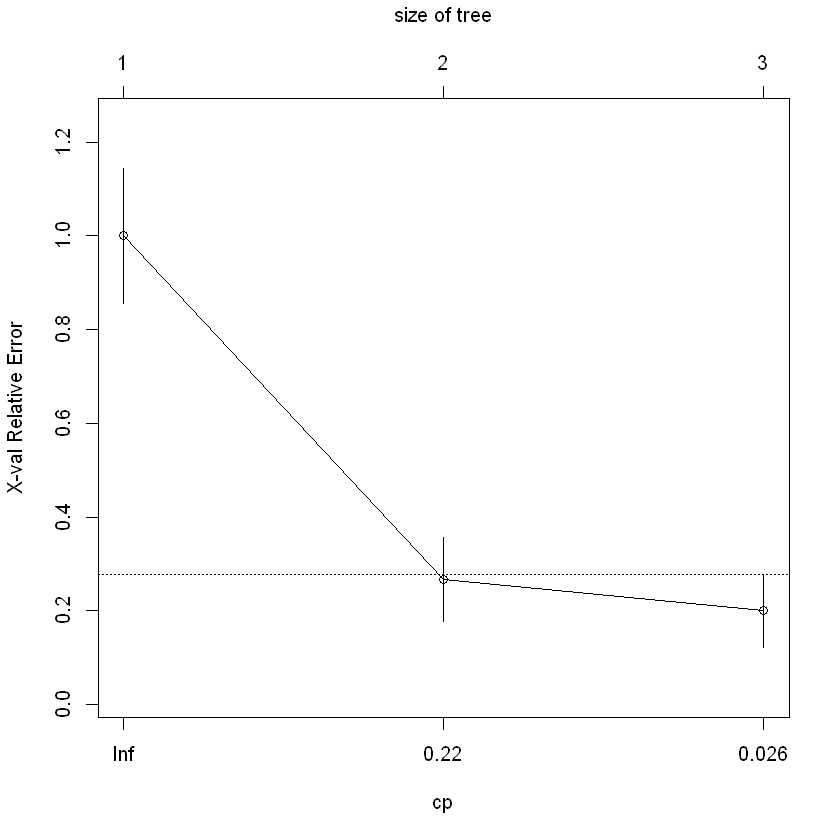

In [25]:
plotcp(fit)

In [26]:
?rpart

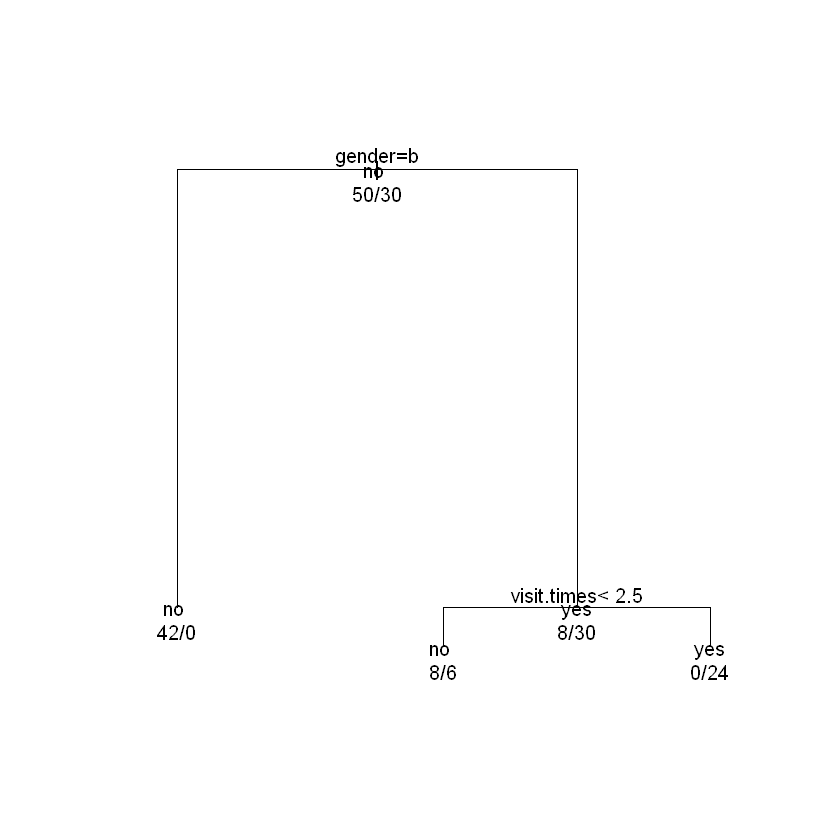

In [32]:
plot(fit, margin=0.1)
text(fit, all=TRUE, use.n = TRUE)

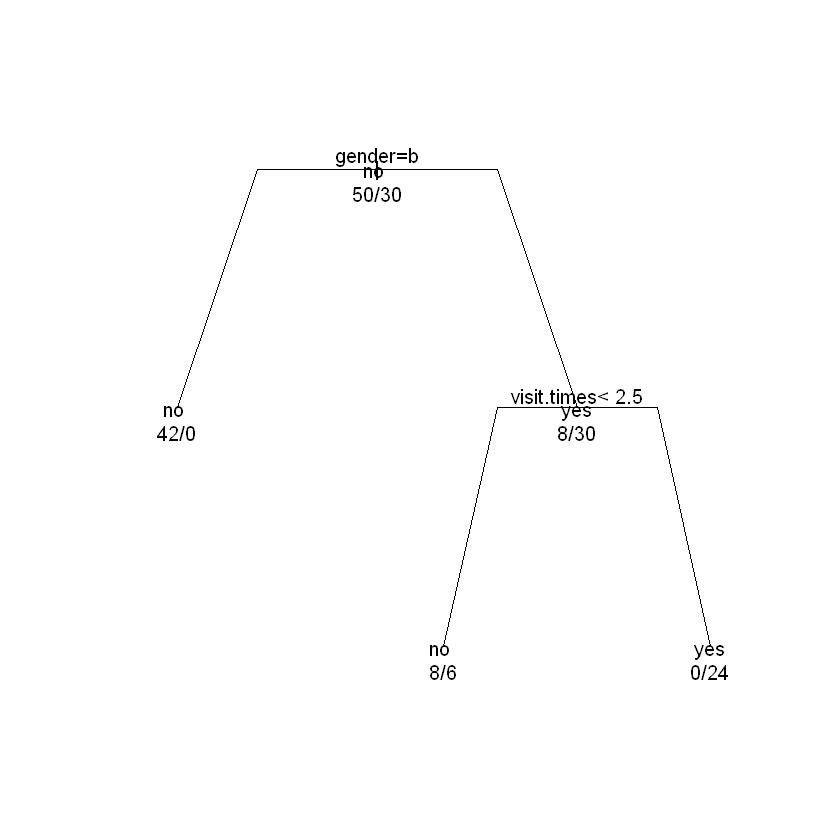

In [36]:
plot(fit, uniform = TRUE, branch = 0.6, margin=0.1)
text(fit, all=TRUE, use.n = TRUE)

### Performance measurement

In [39]:
pred = predict(fit, testset[,! names(testset) %in% c("buy")], type="class")

In [40]:
table(pred)

pred
 no yes 
 12   8 

In [46]:
install.packages('e1071', repos="http://cran.us.r-project.org", dependencies=TRUE)
confusionMatrix(pred, testset[,c("buy")])

also installing the dependency 'mlbench'



package 'mlbench' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ZekeLabs\AppData\Local\Temp\Rtmp0QIopw\downloaded_packages


Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  11   1
       yes  0   8
                                          
               Accuracy : 0.95            
                 95% CI : (0.7513, 0.9987)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : 0.0001114       
                                          
                  Kappa : 0.898           
 Mcnemar's Test P-Value : 1.0000000       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8889          
         Pos Pred Value : 0.9167          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5500          
         Detection Rate : 0.5500          
   Detection Prevalence : 0.6000          
      Balanced Accuracy : 0.9444          
                                          
       'Positive' Class : no              
                                          

In [47]:
install.packages("ROCR",repos="http://cran.us.r-project.org")

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ZekeLabs\AppData\Local\Temp\Rtmp0QIopw\downloaded_packages


In [50]:
library(ROCR)

## ROCR - Receiver Operating Charactertic Curve
## Performance of binary classifier
## Plots true positive & false positive for different cut points

In [51]:
pred2 <- predict(fit,testset[, !names(testset) %in% c("buy")], probability=TRUE)

In [52]:
pred.to.roc = pred2[,c("yes")]

In [58]:
pred.rocr = prediction(pred.to.roc, testset$buy)

In [60]:
pred.rocr

An object of class "prediction"
Slot "predictions":
[[1]]
        4         5        16        20        25        38        40        46 
1.0000000 0.0000000 1.0000000 0.0000000 1.0000000 0.4285714 1.0000000 0.0000000 
       50        55        61        62        64        66        68        71 
0.0000000 0.0000000 0.0000000 1.0000000 1.0000000 0.0000000 0.0000000 0.0000000 
       76        85        89        97 
0.4285714 1.0000000 1.0000000 0.0000000 


Slot "labels":
[[1]]
 [1] yes no  yes no  yes yes yes no  no  no  no  yes yes no  no  no  no  yes yes
[20] no 
Levels: no < yes


Slot "cutoffs":
[[1]]
                 89        76        97 
      Inf 1.0000000 0.4285714 0.0000000 


Slot "fp":
[[1]]
[1]  0  0  1 11


Slot "tp":
[[1]]
[1] 0 8 9 9


Slot "tn":
[[1]]
[1] 11 11 10  0


Slot "fn":
[[1]]
[1] 9 1 0 0


Slot "n.pos":
[[1]]
[1] 9


Slot "n.neg":
[[1]]
[1] 11


Slot "n.pos.pred":
[[1]]
[1]  0  8 10 20


Slot "n.neg.pred":
[[1]]
[1] 20 12 10  0



In [57]:
testset$buy

[1] yes no  yes no  yes yes yes no  no  no  no  yes yes no  no  no  no  yes yes
[20] no 
Levels: no yes

In [61]:
perf.rocr = performance(pred.rocr, measure = "auc", x.measure = "cutoff")

In [62]:
perf.tpr.rocr = performance(pred.rocr, "tpr","fpr")

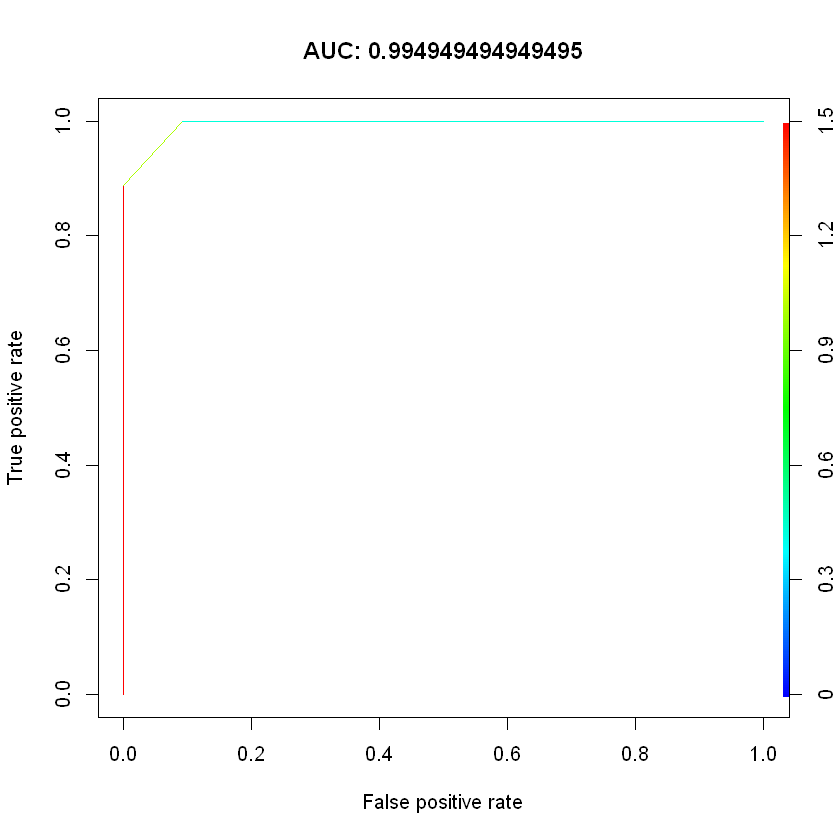

In [63]:
plot(perf.tpr.rocr, colorize=T,main=paste("AUC:",(perf.rocr@y.values)))